# Data Exploration

Begin with data exploration to understand the data set, including the type of data, the size of the dataset, and other relevant metrics.

In [41]:
# %pip install pandas matplotlib seaborn nltk gensim scikit-learn textblob transformers torch datasets

import pandas as pd
file_path = 'bbc-news-data.csv'
df = pd.read_csv(file_path, delimiter='\t')

df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [42]:
print(f"Dataset size: {df.shape}")
print(df.columns)

Dataset size: (2225, 4)
Index(['category', 'filename', 'title', 'content'], dtype='object')


In [43]:
print(df['category'].describe())

count      2225
unique        5
top       sport
freq        511
Name: category, dtype: object


In [44]:
print(df['title'].describe())

count                                  2225
unique                                 2096
top       Doors open at biggest gadget fair
freq                                      2
Name: title, dtype: object


In [45]:
print(df['content'].describe())

count                                                  2225
unique                                                 2092
top        Fast web access is encouraging more people to...
freq                                                      2
Name: content, dtype: object


In [46]:
category_distribution = df['category'].value_counts()
print(category_distribution)

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


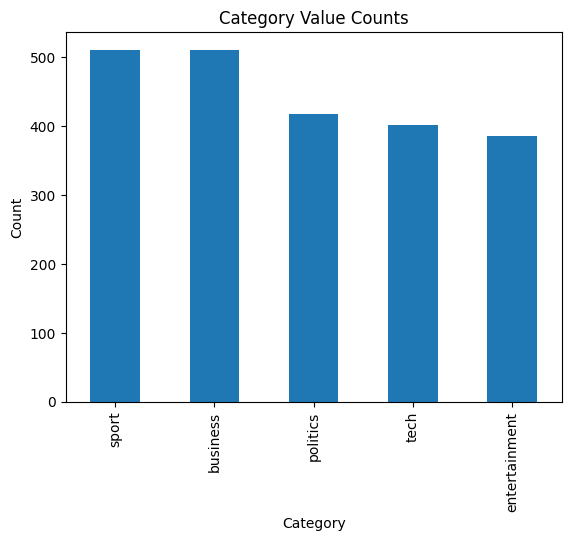

In [47]:
import matplotlib.pyplot as plt

category_distribution.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Value Counts')

plt.show()

# Data Preparation

Clean the article content and reduce noise in data by removing special characters, converting all text to lowercase, tokenizing the content for easier processing and lemmatizing the tokens. 


In [48]:
import re
import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk import download
from nltk.stem import WordNetLemmatizer

download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    #remove HTML tags and lowercase the text
    text = re.sub(r'<.*?>', '', text).lower()
    #remove non-word characters
    text = re.sub(r'[^\w\s]', '', text)
    
    #tokenize the text
    tokens = simple_preprocess(text)
    #lemmatize the tokens and remove stop words
    lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS]
    return lemmatized_text

#create new column in dataframe with cleaned text
df['processed_text'] = df['content'].apply(clean_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nkotturu_umass_edu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
df.head()

,category,filename,title,content,processed_text
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[quarterly, profit, medium, giant, timewarner,..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[dollar, hit, highest, level, euro, month, fed..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[owner, embattled, russian, oil, giant, yukos,..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[british, airway, blamed, high, fuel, price, d..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[share, uk, drink, food, firm, allied, domecq,..."


In [50]:
# Calculate the length of each article
df['word_count'] = df['processed_text'].apply(len)


# Overall word count distribution
overall_word_count_distribution = df['word_count'].describe()
print("Overall Word Count Distribution:")
print(overall_word_count_distribution)


# Word count distribution per category
category_word_count_distribution = df.groupby('category')['word_count'].describe()
print("\nWord Count Distribution per Category:")
print(category_word_count_distribution)

df.head()

Overall Word Count Distribution:
count    2225.000000
mean      190.300674
std       110.557429
min        40.000000
25%       122.000000
50%       167.000000
75%       234.000000
max      1947.000000
Name: word_count, dtype: float64

Word Count Distribution per Category:
               count        mean         std   min    25%    50%    75%  \
category                                                                  
business       510.0  169.337255   68.880495  62.0  121.0  156.5  200.0   
entertainment  386.0  168.062176  121.580848  72.0  114.0  137.5  184.0   
politics       417.0  223.237410  133.961241  40.0  159.0  222.0  263.0   
sport          511.0  157.430528   91.351500  54.0   97.0  132.0  194.5   
tech           401.0  246.004988  108.312788  85.0  174.0  222.0  307.0   

                  max  
category               
business        457.0  
entertainment  1594.0  
politics       1947.0  
sport           837.0  
tech           1272.0  


,category,filename,title,content,processed_text,word_count
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[quarterly, profit, medium, giant, timewarner,...",217
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[dollar, hit, highest, level, euro, month, fed...",196
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[owner, embattled, russian, oil, giant, yukos,...",142
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[british, airway, blamed, high, fuel, price, d...",211
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[share, uk, drink, food, firm, allied, domecq,...",147


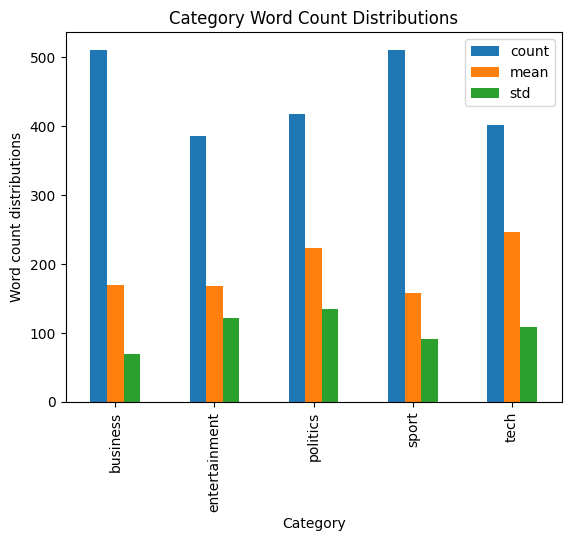

In [51]:
stats = category_word_count_distribution[['count', 'mean', 'std']]
stats.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Word count distributions')
plt.title('Category Word Count Distributions')

plt.show()

# Sentiment Analysis

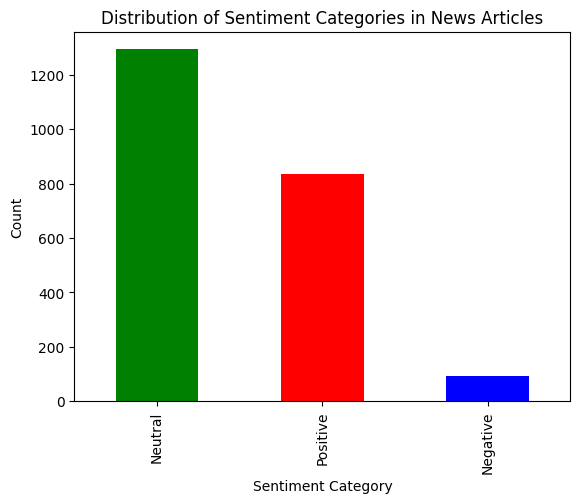

,category,filename,title,content,processed_text,word_count,sentiment_score,sentiment_category
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[quarterly, profit, medium, giant, timewarner,...",217,0.134936,Positive
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[dollar, hit, highest, level, euro, month, fed...",196,0.023280,Neutral
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[owner, embattled, russian, oil, giant, yukos,...",142,-0.004861,Neutral
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[british, airway, blamed, high, fuel, price, d...",211,0.183004,Positive
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[share, uk, drink, food, firm, allied, domecq,...",147,0.024167,Neutral
...,...,...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,"[bt, introducing, initiative, help, beat, rogu...",215,0.115530,Positive
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,"[user, world, continue, ignore, security, warn...",190,0.169048,Positive
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,"[new, european, directive, software, writer, r...",461,0.078777,Neutral
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,"[man, making, sure, network, safe, secure, res...",189,-0.001316,Neutral


In [52]:
import ast
from textblob import TextBlob  


# sentiment analysis function
def get_sentiment(text):
    """Calculate the sentiment polarity of a given text using TextBlob."""
    blob = TextBlob(text)
    return blob.sentiment.polarity

# apply sentiment analysis
df['sentiment_score'] = df['processed_text'].apply(
    lambda x: get_sentiment(" ".join(x))
)


# categorize the sentiment into pos, neg, or neutral
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    

# create new column for sentiment category
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

#visualize barplot
category_counts = df['sentiment_category'].value_counts()
category_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories in News Articles')
plt.show()

df

# ML Model Development

Experiment with different ML models and evaluate the best model for news categorization.

### Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

X = df['processed_text'].astype(str)
y = df['category']

#split the dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

#vectorize the content - remove stop words
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#build the logistic regression model with 1000 iterations and fit it to the training sets
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nkotturu_umass_edu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LogisticRegression(max_iter=1000)

Accuracy: 95.5090%
               precision    recall  f1-score   support

     business       0.97      0.92      0.95       172
entertainment       0.96      0.97      0.97       113
     politics       0.92      0.96      0.94       115
        sport       0.95      0.99      0.97       140
         tech       0.98      0.94      0.96       128

     accuracy                           0.96       668
    macro avg       0.95      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



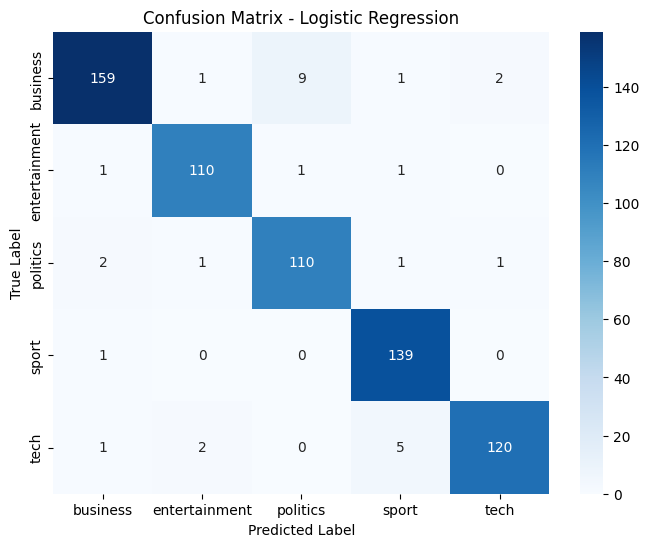

In [54]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.4f}%')

print(classification_report(y_test, y_pred))

#build the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Logistic Regression with Trigrams

In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


# Create pipeline
pipeline = Pipeline([
    ('features', FeatureUnion([
        # ('count_vectorizer', CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2, max_df=0.9)),
        ('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 3), stop_words='english', min_df=2, max_df=0.9))
    ])),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [56]:
X = df['processed_text'].astype(str)
y = df['category']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tfidf_vectorizer',
                                                 TfidfVectorizer(max_df=0.9,
                                                                 min_df=2,
                                                                 ngram_range=(1,
                                                                              3),
                                                                 stop_words='english'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [57]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.4f}%')

print(classification_report(y_test, y_pred))


Accuracy: 96.1078%
               precision    recall  f1-score   support

     business       0.97      0.94      0.95       172
entertainment       0.97      0.97      0.97       113
     politics       0.92      0.96      0.94       115
        sport       0.96      0.99      0.98       140
         tech       0.98      0.95      0.96       128

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



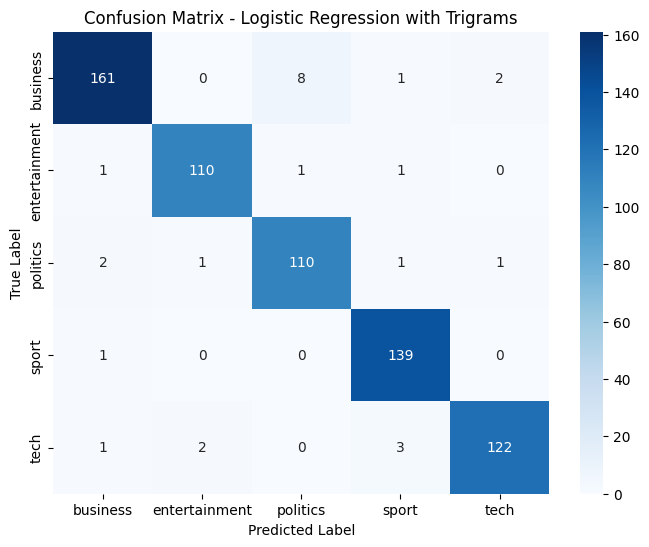

In [58]:
#build the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression with Trigrams')
plt.show()

### K-Nearest Neighbors

Accuracy: 93.5629%
               precision    recall  f1-score   support

     business       0.96      0.87      0.91       172
entertainment       0.95      0.92      0.94       113
     politics       0.84      0.97      0.90       115
        sport       0.96      0.99      0.98       140
         tech       0.97      0.94      0.95       128

     accuracy                           0.94       668
    macro avg       0.94      0.94      0.94       668
 weighted avg       0.94      0.94      0.94       668



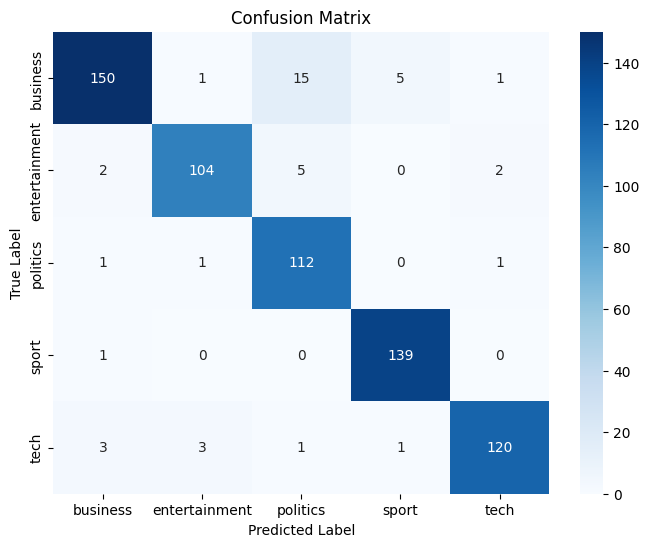

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid


knnModel = KNeighborsClassifier(n_neighbors=8, algorithm="brute")
knnModel.fit(X_train_tfidf, y_train)
y_pred_KNN = knnModel.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_KNN)
print(f'Accuracy: {accuracy * 100:.4f}%')
print(classification_report(y_test, y_pred_KNN))


cmKNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(8,6))
sns.heatmap(cmKNN, annot=True, fmt='d', cmap='Blues', xticklabels=knnModel.classes_, yticklabels=knnModel.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Nearest Centroid

Accuracy: 94.9102%
               precision    recall  f1-score   support

     business       0.94      0.94      0.94       172
entertainment       0.95      0.97      0.96       113
     politics       0.94      0.90      0.92       115
        sport       0.95      0.99      0.97       140
         tech       0.98      0.94      0.96       128

     accuracy                           0.95       668
    macro avg       0.95      0.95      0.95       668
 weighted avg       0.95      0.95      0.95       668



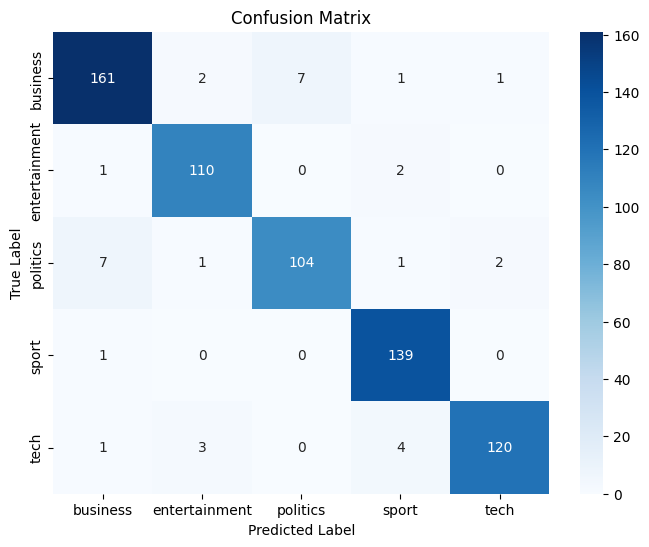

In [60]:
nc = NearestCentroid()
nc.fit(X_train_tfidf, y_train)
y_nc = nc.predict(X_test_tfidf)

accuracyNearestC = accuracy_score(y_test, y_nc)
print(f'Accuracy: {accuracyNearestC * 100:.4f}%')
print(classification_report(y_test, y_nc))


cmNC = confusion_matrix(y_test, y_nc)
plt.figure(figsize=(8,6))
sns.heatmap(cmNC, annot=True, fmt='d', cmap='Blues', xticklabels=nc.classes_, yticklabels=nc.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from transformers import BertTokenizer
from datasets import Dataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

df['text'] = df['processed_text'].apply(lambda x: " ".join(x))

dataset = Dataset.from_pandas(df[['text', 'category']])

train_dataset, test_dataset = dataset.train_test_split(test_size=0.2).values()

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

label2id = {label: idx for idx, label in enumerate(df['category'].unique())}
train_dataset = train_dataset.map(lambda e: {'label': label2id[e['category']]})
test_dataset = test_dataset.map(lambda e: {'label': label2id[e['category']]})

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/1780 [00:00<?, ? examples/s]

Map:   0%|          | 0/445 [00:00<?, ? examples/s]

Map:   0%|          | 0/1780 [00:00<?, ? examples/s]

Map:   0%|          | 0/445 [00:00<?, ? examples/s]

In [62]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label2id))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [65]:
# arguments for the BERT model
training_args = TrainingArguments(
    output_dir='./results',        
    num_train_epochs=10,           
    per_device_train_batch_size=8, 
    per_device_eval_batch_size=8,  
    warmup_steps=500,             
    weight_decay=0.01,             
    logging_dir='./logs',  
    logging_steps=10,
    eval_strategy='epoch',   
)

# train the model
trainer = Trainer(
    model=model,                    
    args=training_args,                
    train_dataset=train_dataset, 
    eval_dataset=test_dataset,        
    compute_metrics=lambda p: {
        'accuracy': accuracy_score(p.predictions.argmax(-1), p.label_ids)
    },                           
)


In [66]:
trainer.train()
results = trainer.evaluate()

print(f"Evaluation results: {results}")


Epoch,Training Loss,Validation Loss,Accuracy
1,0.001300,0.143801,0.977528
2,0.222800,0.263566,0.966292
3,0.051700,0.211596,0.973034
4,0.000300,0.230827,0.970787
5,0.000500,0.201454,0.973034
6,0.000100,0.216226,0.970787
7,0.000100,0.176305,0.977528
8,0.000100,0.188193,0.977528
9,0.000100,0.191829,0.975281
10,0.000100,0.192500,0.975281


Evaluation results: {'eval_loss': 0.19249983131885529, 'eval_accuracy': 0.9752808988764045, 'eval_runtime': 2.826, 'eval_samples_per_second': 157.465, 'eval_steps_per_second': 19.816, 'epoch': 10.0}


Accuracy: 97.5281%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       1.00      0.99      0.99        75
           2       0.98      0.93      0.95        87
           3       0.99      1.00      1.00       103
           4       0.95      0.99      0.97        92

    accuracy                           0.98       445
   macro avg       0.98      0.97      0.98       445
weighted avg       0.98      0.98      0.98       445



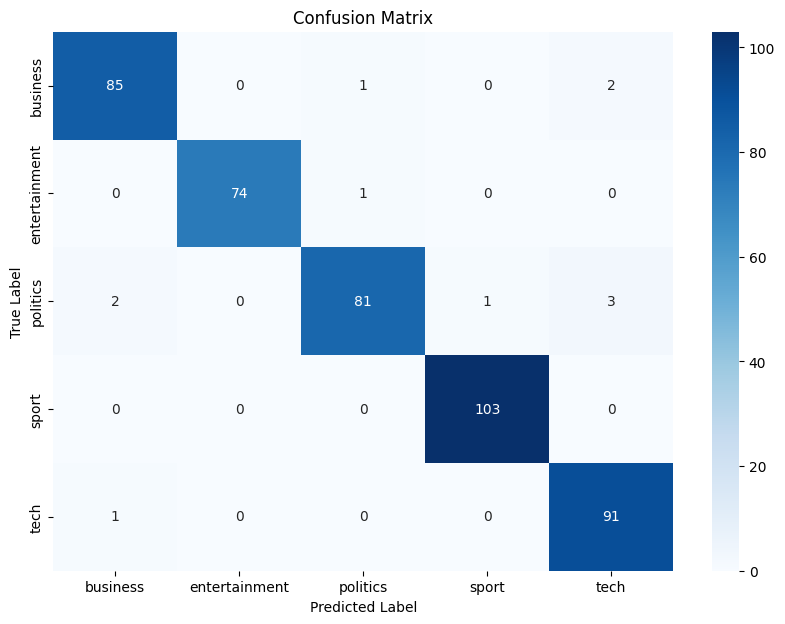

In [73]:
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(-1)

# convert labels to np arrays 
y_true = test_dataset['label'].cpu().numpy() if hasattr(test_dataset['label'], 'cpu') else test_dataset['label']
predicted_labels = predicted_labels.cpu().numpy() if hasattr(predicted_labels, 'cpu') else predicted_labels

# calculate the accuracy of the model
accuracy = accuracy_score(y_true, predicted_labels)
print(f'Accuracy: {accuracy * 100:.4f}%')

print(classification_report(y_true, predicted_labels))

# create a confusion matrix
cm = confusion_matrix(y_true, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=id2label.values(), yticklabels=id2label.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()